In [1]:
import turicreate

In [2]:
sales = turicreate.SFrame("Philadelphia_Crime_Rate_noNA.csv")

Finished parsing file /home/ishaan/Documents/Coursera_Machine_Learning_University_of_Washington/Course2_Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.030181 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ishaan/Documents/Coursera_Machine_Learning_University_of_Washington/Course2_Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.022462 secs.

In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
turicreate.show(sales["CrimeRate"], sales["HousePrice"])

Materializing X axis SArray

Materializing Y axis SArray

In [5]:
crime_model = turicreate.linear_regression.create(
    sales,
    target="HousePrice",
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

In [6]:
crime_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 99
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0028

Settings
--------
Residual sum of squares        : 689739332971.092
Training RMSE                  : 83468.9401

Highest Positive Coefficients
-----------------------------
(intercept)                    : 176626.0469

Lowest Negative Coefficients
----------------------------
CrimeRate                      : -576.8049

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

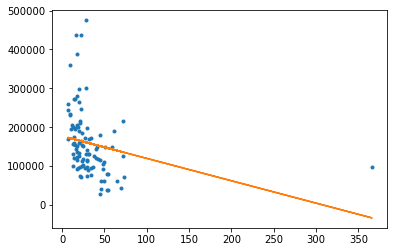

In [9]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model.predict(sales),'-')

In [10]:
sales_noCC = sales[sales['MilesPhila']!=0.0]

In [11]:
turicreate.show(sales_noCC['CrimeRate'],sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [12]:
crime_model_noCC = turicreate.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)

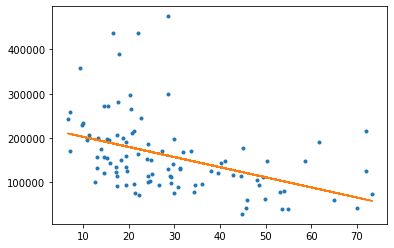

In [13]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [15]:
crime_model_noCC.coefficients


name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [16]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


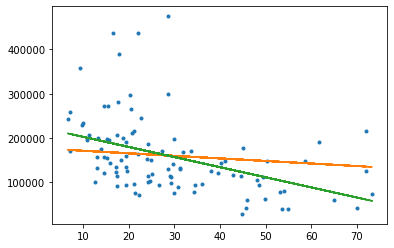

In [17]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [18]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = turicreate.linear_regression.create(
    sales_nohighend,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

In [19]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [20]:
crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.5896152512,11932.510110455862
CrimeRate,None,-1837.712809888722,351.5196093328531


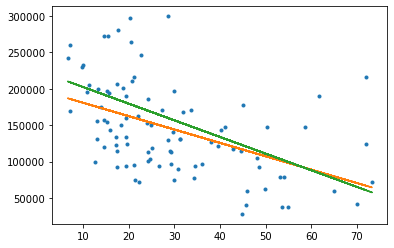

In [21]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(sales_nohighend), '-')         